In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip freeze

In [3]:
import pandas as pd
import numpy as np
import os,sys
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime

In [4]:
df = pd.read_csv('AAPL.csv')
df = df.round(decimals=2, out=None)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.49,58.93,58.43,58.75,50.77,75555200
1,04-01-2012,58.57,59.24,58.47,59.06,51.04,65005500
2,05-01-2012,59.28,59.79,58.95,59.72,51.61,67817400
3,06-01-2012,59.97,60.39,59.89,60.34,52.14,79573200
4,09-01-2012,60.79,61.11,60.19,60.25,52.06,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.53,284.25,280.37,284.00,282.05,24643000
2007,24-12-2019,284.69,284.89,282.92,284.27,282.32,12119700
2008,26-12-2019,284.82,289.98,284.70,289.91,287.92,23280300
2009,27-12-2019,291.12,293.97,288.12,289.80,287.81,36566500


### About Dataset

**There are Open, High, Low and Close price has been given for each day starting from 2012 to 2019 for Apple stock.**

**1)Open**      : The opening price of that day.

**2)High**      : The highest price that Apple stocks were negotiated that day.

**3)Low**       : The lowest price that Apple stocks were negotiated that      day.

**4)Close**     : The last price negotiated for Apple stocks that day.

**5)Adj Close** : The Adjusted Closing Price for Apple stocks that day.

**6)Volume**    : Total financial volume of all negotiations that were made in that specific day.

## Exploratory Data Analysis (EDA)
**EDA is applied to investigate the data and summarize the key insights. It will give you the basic understanding of your data, it's distribution, null values and much more. You can either explore data using graphs or through some python functions. There will be two type of analysis. Univariate and Bivariate.**

In [5]:
# check if there are any null values in Dataset

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

+ No Null Values in Dataset

In [6]:
# check any duplicate values in data 

df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


+ There are no Duplicates in Data 

In [7]:
# Checking datatypes in Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [8]:
df.shape

(2011, 7)

In [9]:
# Describing Dataset

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.00000,2.011000e+03
mean,126.707509,127.827618,125.580308,126.741273,119.50548,5.949670e+07
std,50.483719,50.926281,50.124898,50.578336,52.43837,4.683856e+07
min,55.420000,57.090000,55.010000,55.790000,48.92000,1.136200e+07
25%,85.880000,86.720000,85.060000,86.200000,75.05500,2.758565e+07
50%,113.050000,114.190000,111.870000,113.050000,105.22000,4.346900e+07
75%,165.190000,167.410000,163.425000,165.245000,160.05000,7.471030e+07
max,291.120000,293.970000,288.120000,291.520000,289.52000,3.765300e+08


In [10]:
# Let's Correlate data

df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557957
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559653
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566333
Volume,-0.557957,-0.554909,-0.563426,-0.559653,-0.566333,1.000000


<AxesSubplot:>

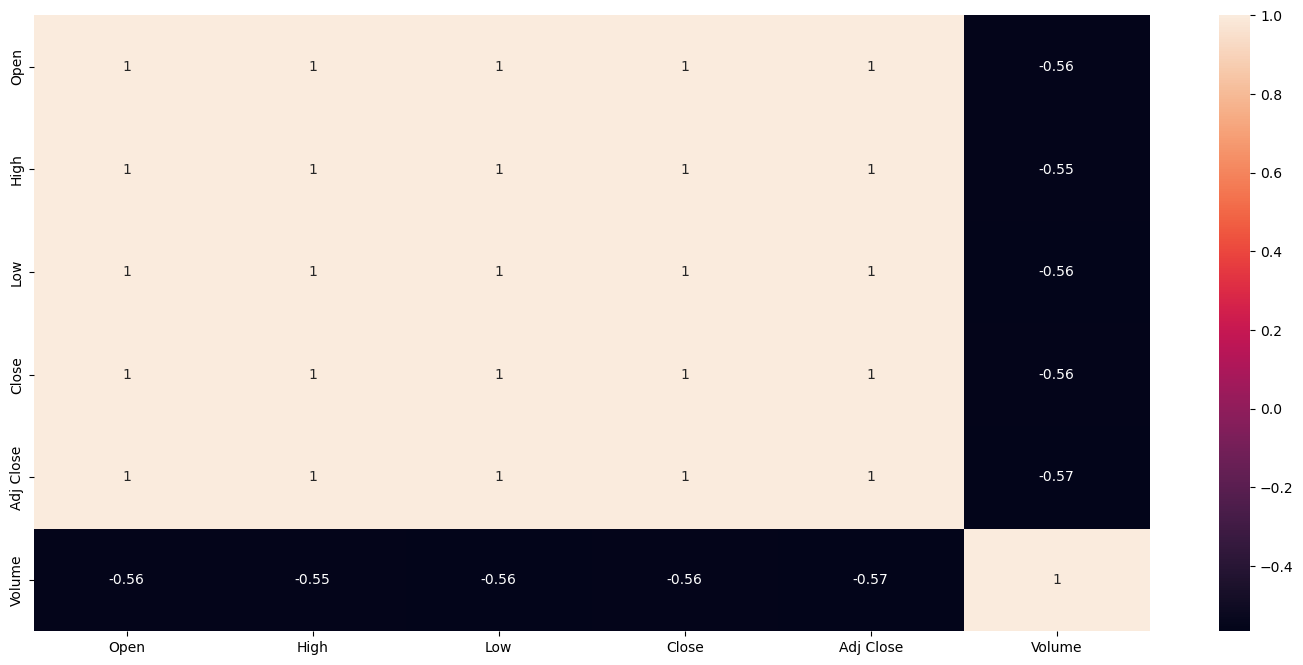

In [11]:
#Visualizing correlation among data 

fig = plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)

**Through Correlation matrix, we can observe that there is high levels of correlation with Open, Low, High, and Closing Prices**

In [12]:
# Changing Dtype of Date to datetime

df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.set_index('Date',inplace=True)


In [13]:
# Make copy of data

df1 = df.copy()
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.49,58.93,58.43,58.75,50.77,75555200
2012-01-04,58.57,59.24,58.47,59.06,51.04,65005500
2012-01-05,59.28,59.79,58.95,59.72,51.61,67817400
2012-01-06,59.97,60.39,59.89,60.34,52.14,79573200
2012-01-09,60.79,61.11,60.19,60.25,52.06,98506100


In [14]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.49,58.93,58.43,58.75,50.77,75555200
2012-01-04,58.57,59.24,58.47,59.06,51.04,65005500
2012-01-05,59.28,59.79,58.95,59.72,51.61,67817400
2012-01-06,59.97,60.39,59.89,60.34,52.14,79573200
2012-01-09,60.79,61.11,60.19,60.25,52.06,98506100


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


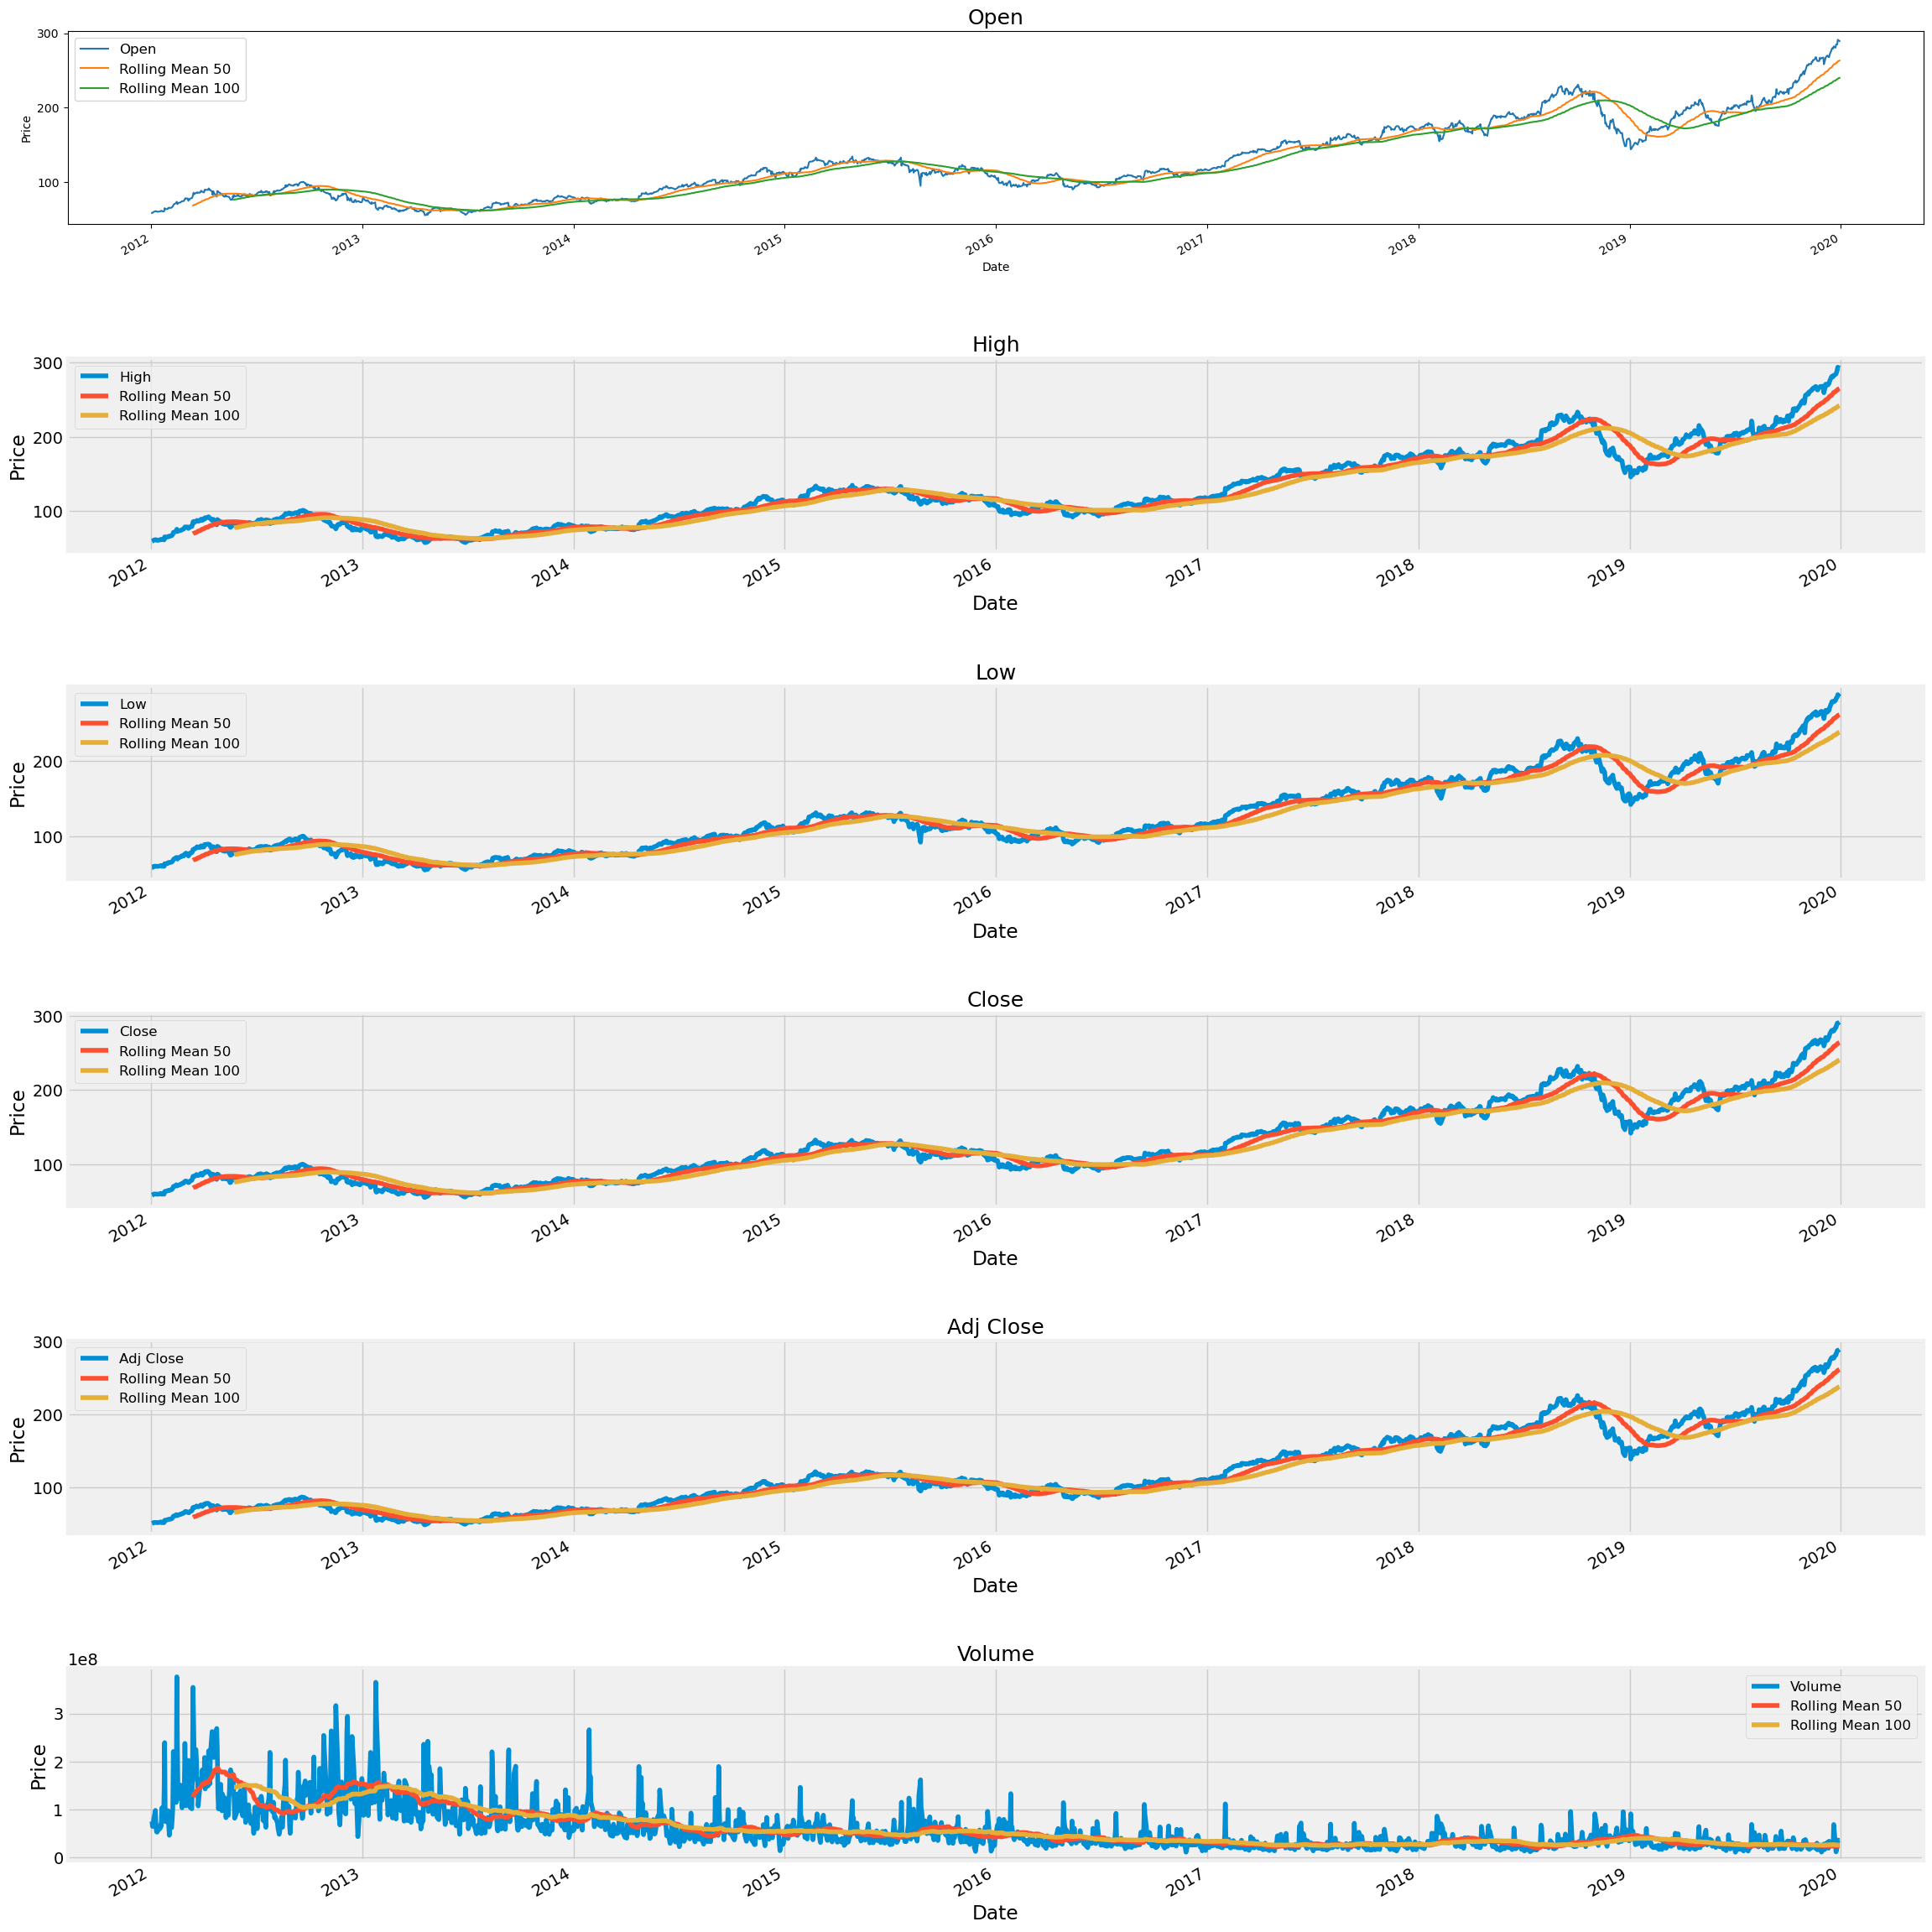

In [16]:
cols = df1.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(df1.iloc[:,i],label=cols[i])
  df1.iloc[:,i].rolling(50).mean().plot(label='Rolling Mean 50')
  df1.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean 100')
  ax.set_title(cols[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

In [17]:
# Droping Columns

df1 = df1.drop(['Open','High','Low','Adj Close','Volume'], axis=1)

In [18]:
## Arranging Columns

columns_ = ['Close']
df1 = df1.reindex(columns=columns_)
df1

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25
...,...
2019-12-23,284.00
2019-12-24,284.27
2019-12-26,289.91


In [19]:
# Resampling Data to Month by Aggregating using mean

monthly_mean = df1['Close'].resample('M').mean()

In [20]:
monthly_df = monthly_mean.to_frame()
monthly_df

,Close
Date,
2012-01-31,61.225500
2012-02-29,71.082000
2012-03-31,82.500909
2012-04-30,86.572500
2012-05-31,80.667273
...,...
2019-08-31,204.957727
2019-09-30,217.995000
2019-10-31,235.286522


In [21]:
monthly_data = df1['Close']
monthly_data = monthly_data.to_frame()
monthly_data

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25
...,...
2019-12-23,284.00
2019-12-24,284.27
2019-12-26,289.91


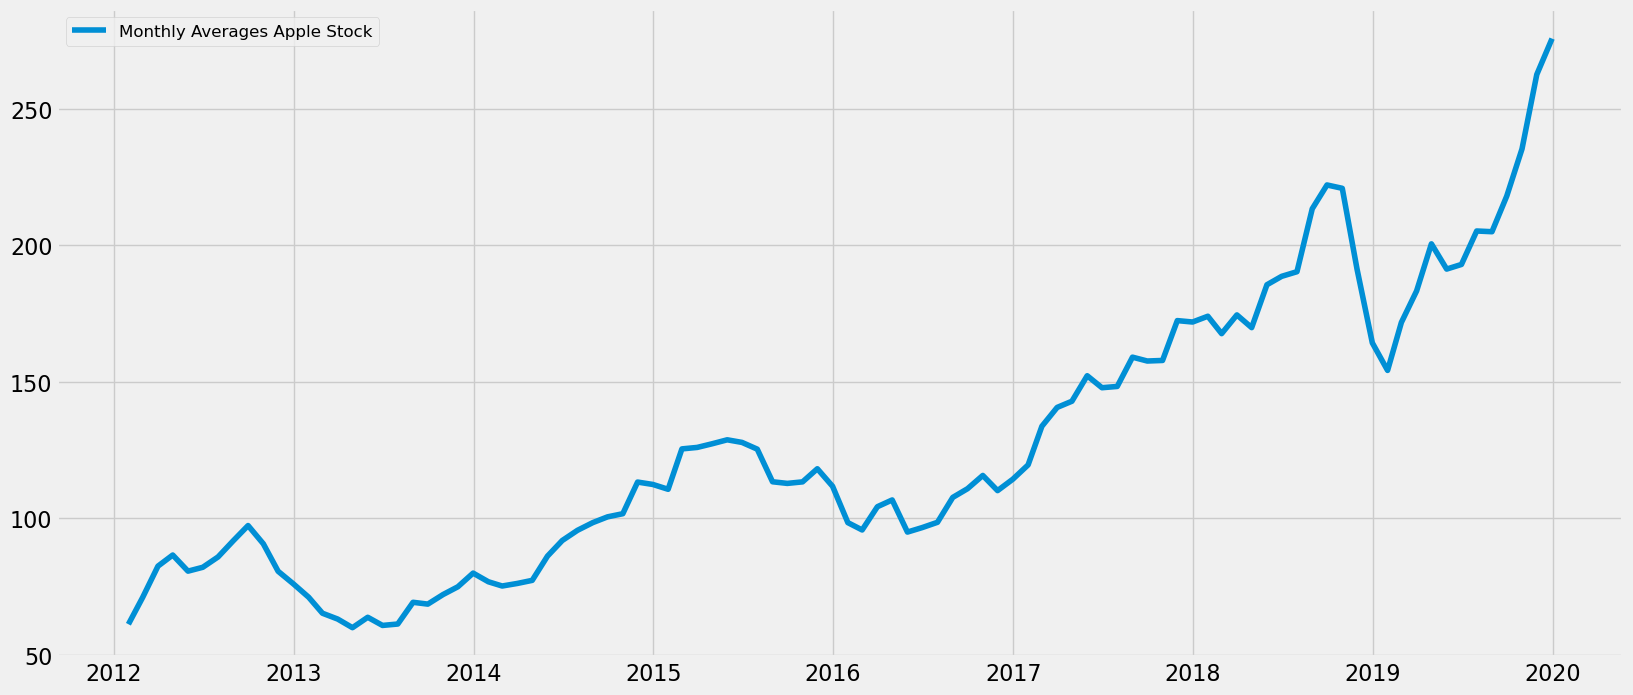

In [22]:
## Monthly Stock Prices 
fig = plt.figure(figsize=(18,8))

plt.plot(monthly_df['Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()




In [23]:
# Checking Trend 

monthly_df['Year'] = monthly_df.index.year
monthly_df['Month'] = monthly_df.index.strftime('%B')
monthly_df['dayofweek'] = monthly_df.index.strftime('%A')
monthly_df['quarter'] = monthly_df.index.quarter
monthly_df.head()

,Close,Year,Month,dayofweek,quarter
Date,,,,,
2012-01-31,61.225500,2012,January,Tuesday,1
2012-02-29,71.082000,2012,February,Wednesday,1
2012-03-31,82.500909,2012,March,Saturday,1
2012-04-30,86.572500,2012,April,Monday,2
2012-05-31,80.667273,2012,May,Thursday,2


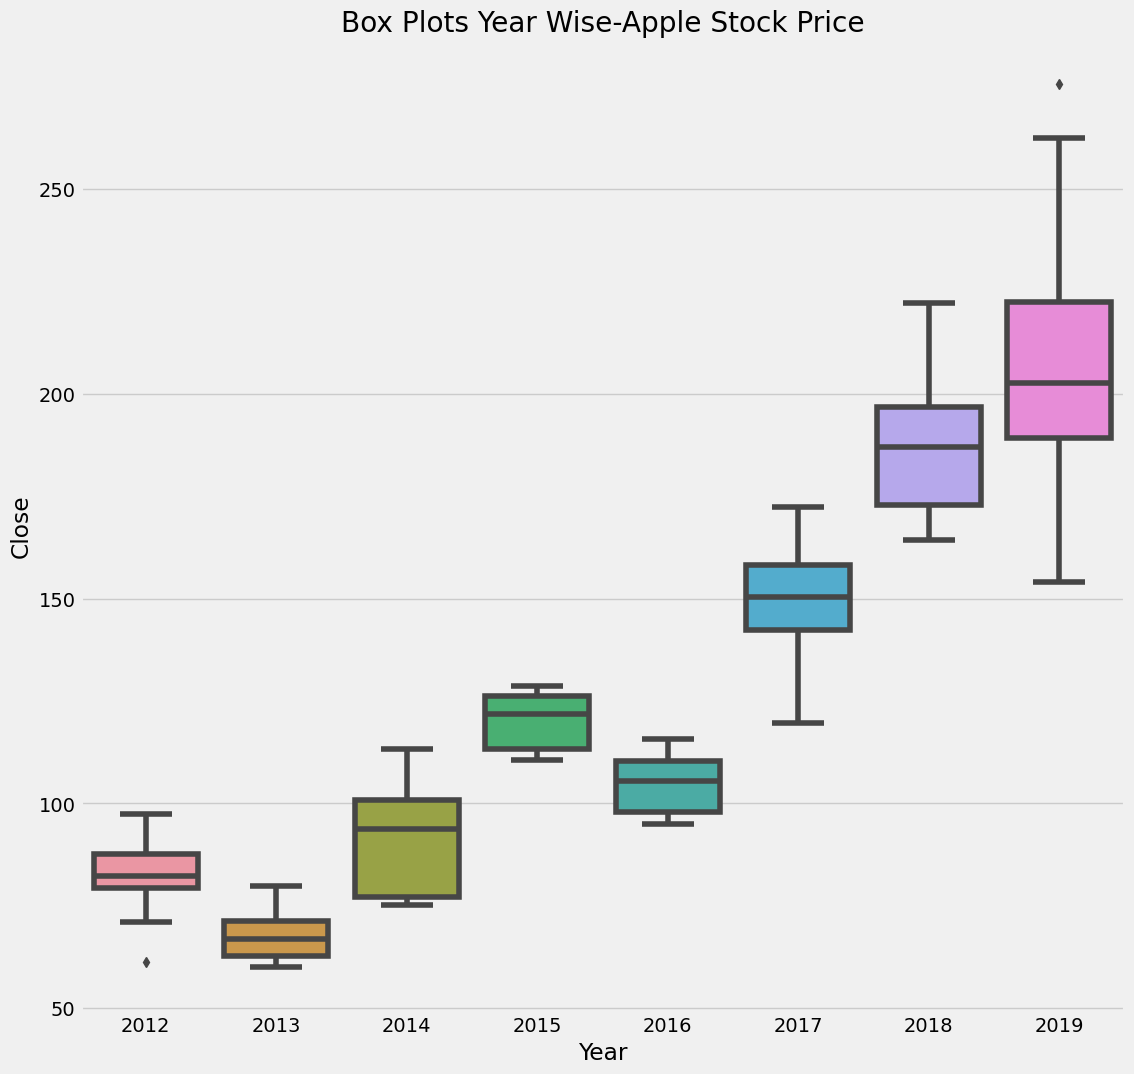

In [24]:
#Box-Plot

plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_df['Year'],y=monthly_df['Close'])
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

+ Outliers Present in Year 2012 and 2019

+ Lot of Variability in Years 2014, 2017-19

+ 2019 most volatile year among all years

+ Upward Rising Trend is shown

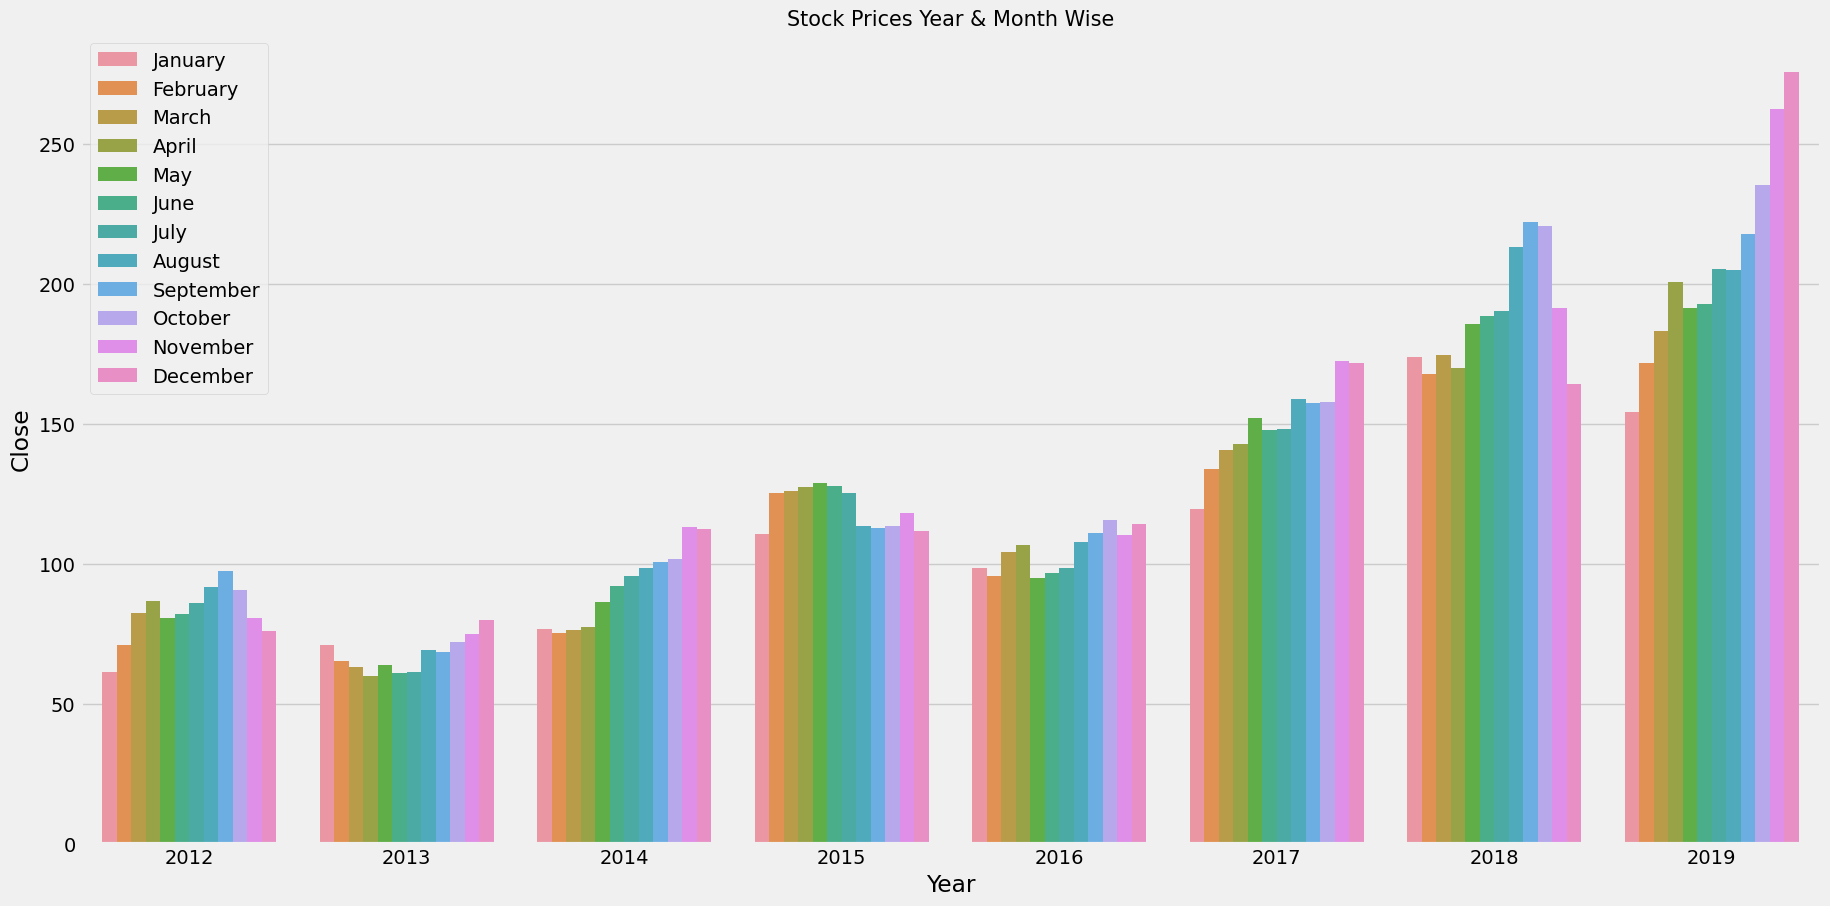

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("Paired", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_df)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. The primary reason for this is as Apple has a product cycle release date during this time.

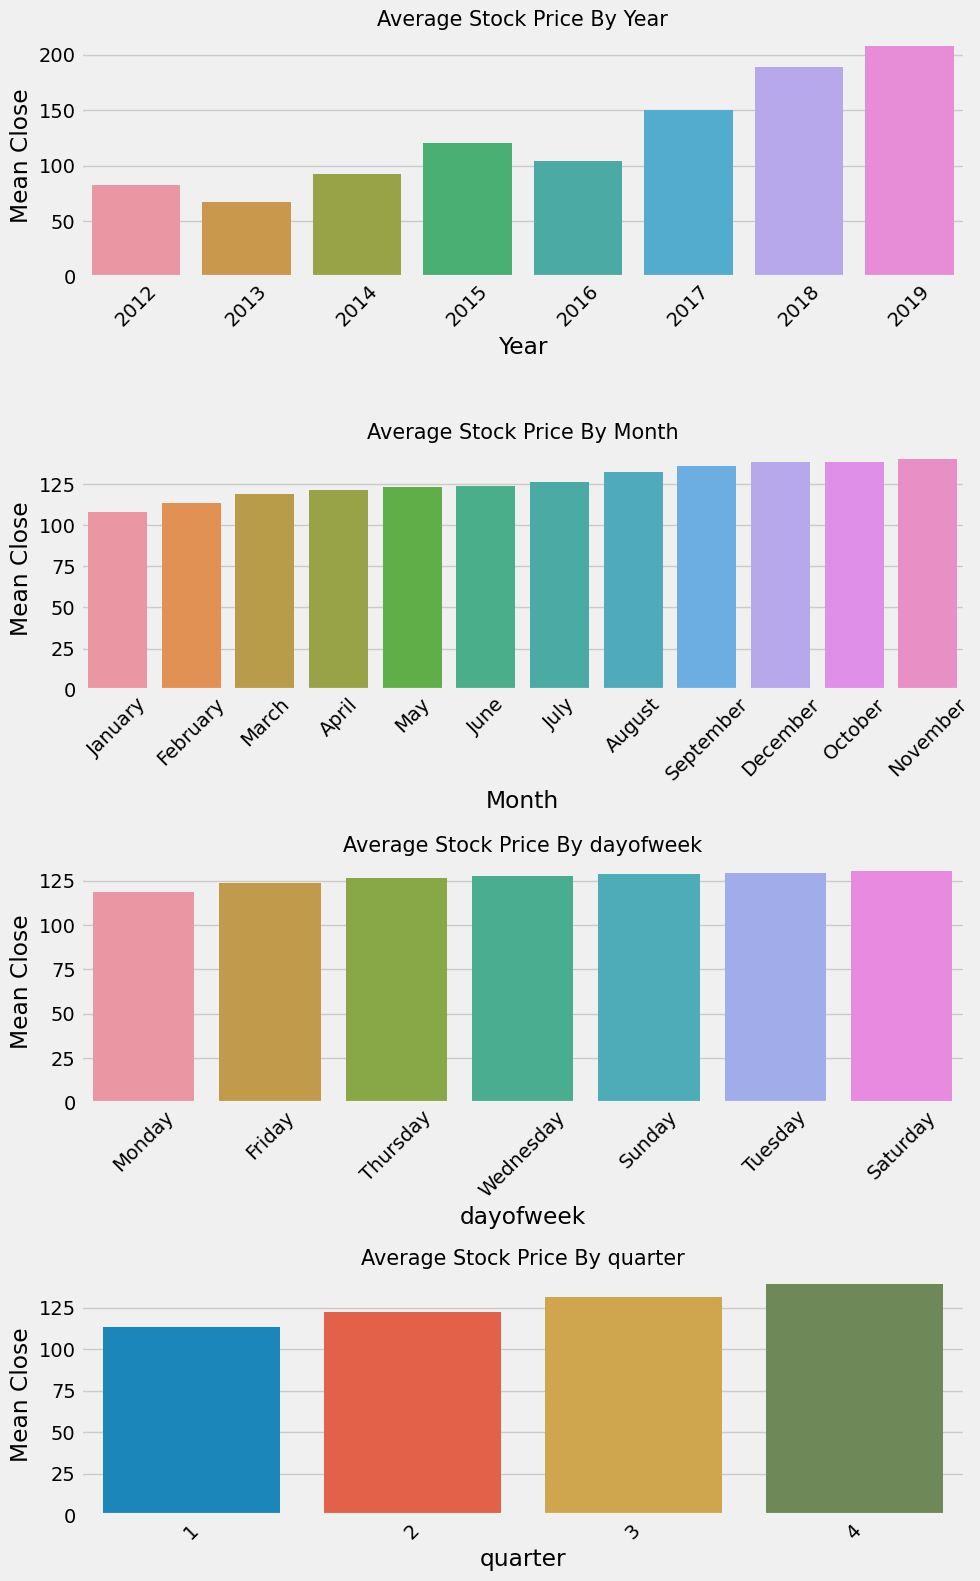

In [26]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_df.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_df.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

+ According to Mean price by Years, 2013 and 2016 are the only years where Mean price is lower than previous Year.

+ Average Stock Price is lower at start of the week in comparision to the end of the week.

+ The Average Price is Highest in the Month of November.

+ Q4 is the best for Apple according to average stock price. By sales figures Q4 has always been strong for Apple since the new product cycle takes place and its the Holiday period. We also observe this as a seasonal effect for Apple.

### Decomposition of Time Series

In [27]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd

<Figure size 2000x1600 with 0 Axes>

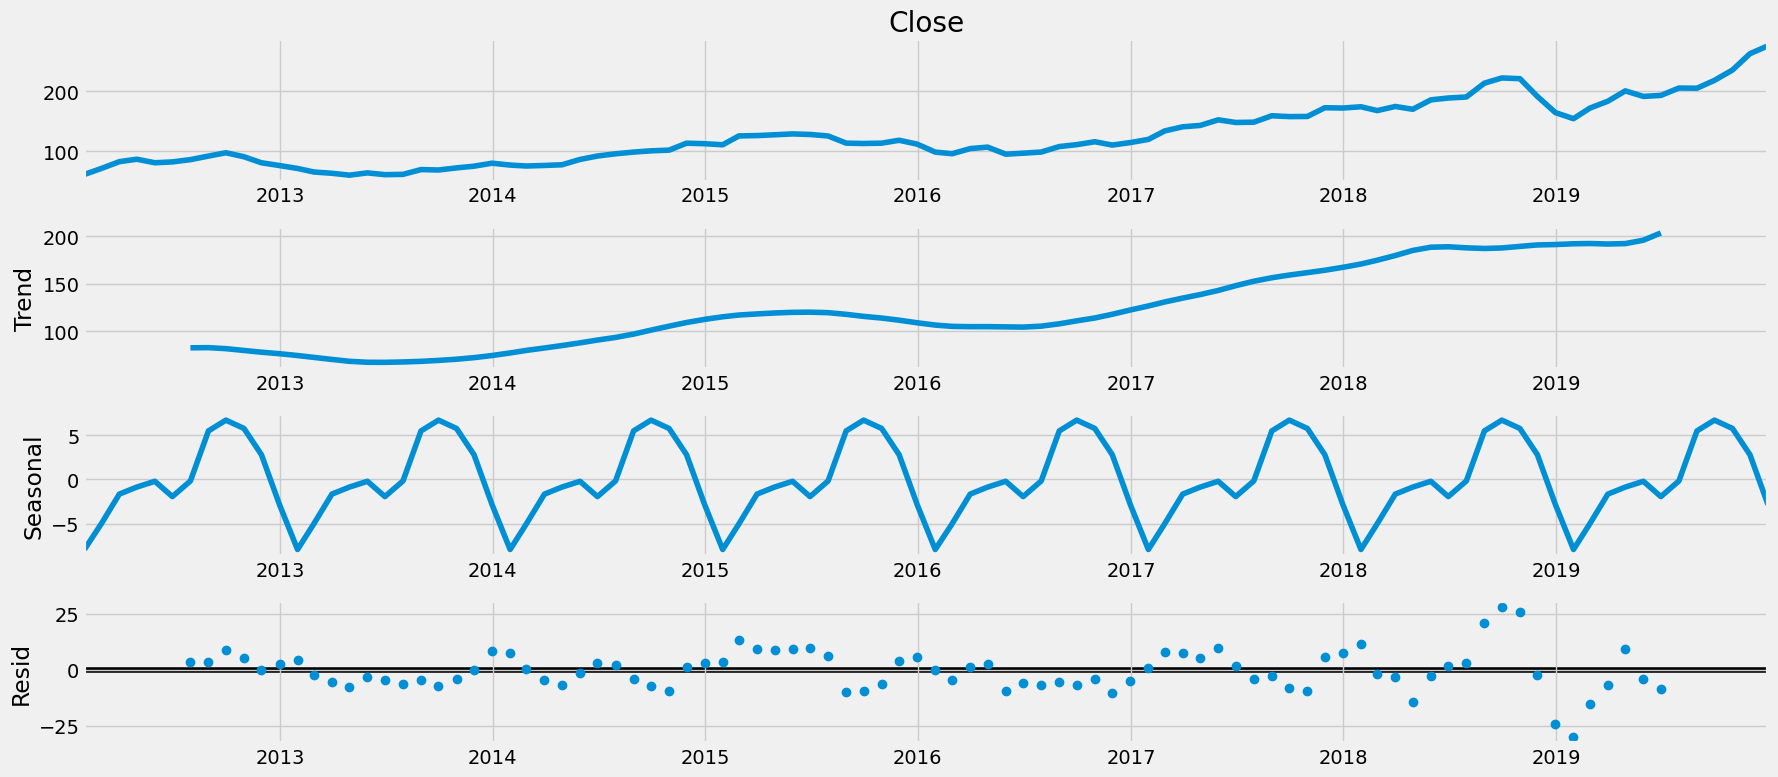

In [28]:
rcParams['figure.figsize']=18,8

plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_df['Close'],model='additive')
decomposed_series.plot()
plt.show()

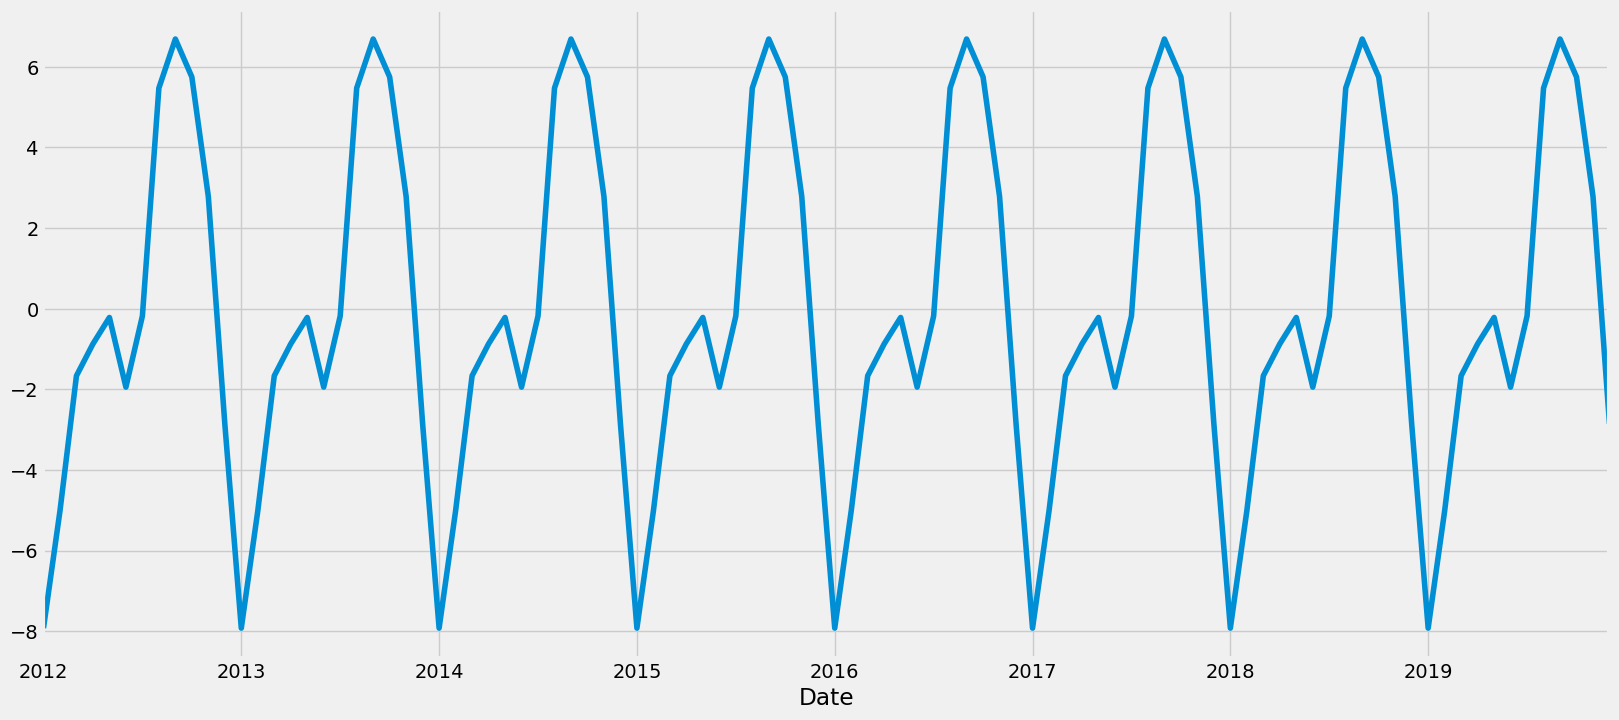

<Figure size 800x800 with 0 Axes>

In [29]:
##Drilling Down and Observing Seasonality

decomposed_series.seasonal['2012':'2019'].plot()
fig = plt.figure(figsize=(8,8))

+ Trend : Overall an Upward Trend

+ Seasonality :There appears to be seasonality,AAPLE has rallied during the last 3 Months of every year. Oct to Dec period has good sales for Apple Over the Years.

### Stationarity and Non-Stationarity of Time Series


+ Time Series is **Stationary** if we have constant mean, constant variance and No Trend and No Seasonality

+ But in our data set we can see uprising trend and also seasonality is present, So we can say that **our data is Non-Stationary.**



### AutoCorrelation Function(ACF) & Partial Autocorrelation Function (PACF)


+ Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots
+ If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
+ This data is non-stationary as a high number of previous observations are correlated with future values.
+ Confidence intervals are drawn as a cone.
+ By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
+ The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

In [30]:
df1

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25
...,...
2019-12-23,284.00
2019-12-24,284.27
2019-12-26,289.91


In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [32]:
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

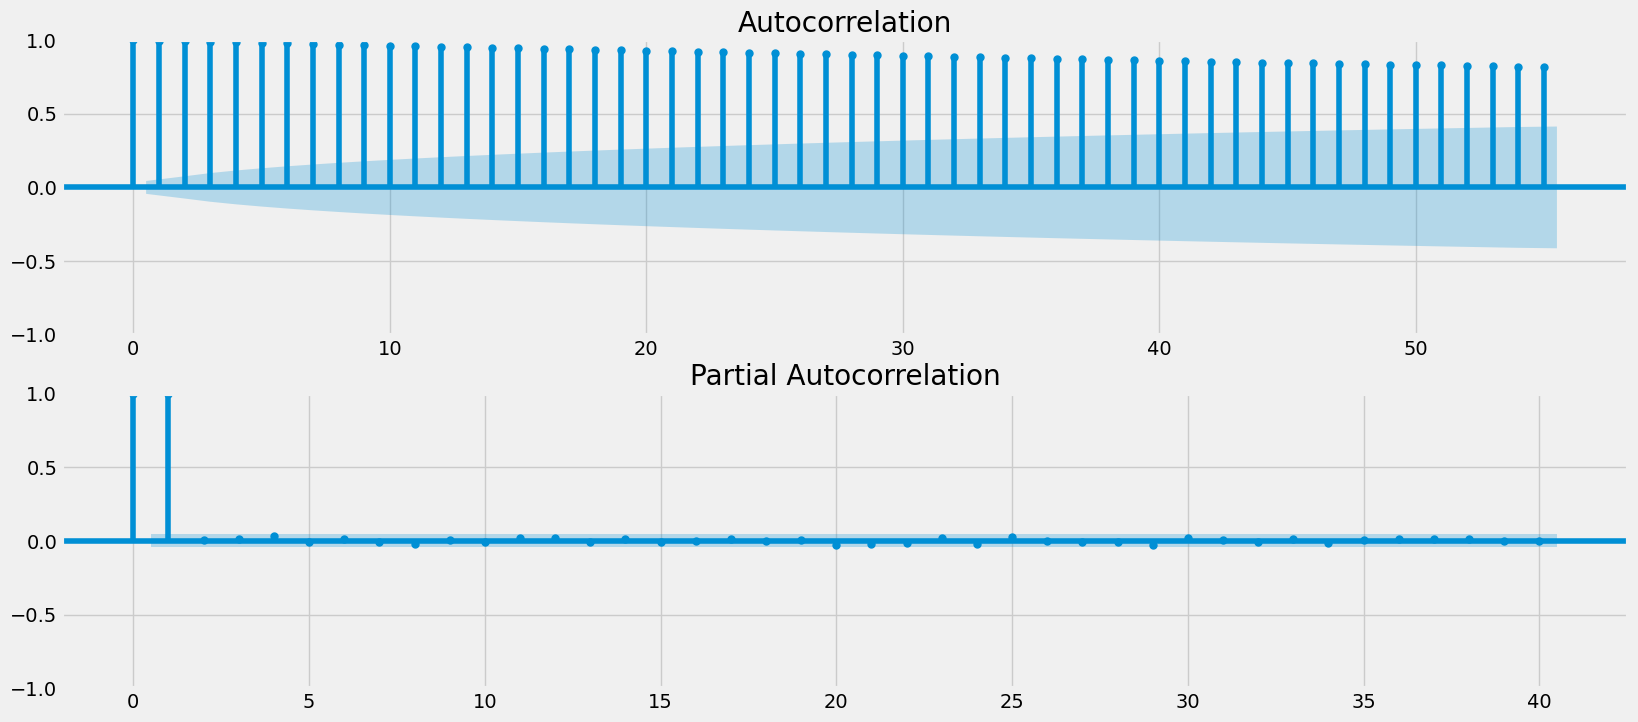

In [35]:
plt.figure()
plt.subplot(211)
plot_acf(df1, ax=plt.gca(), lags = 55)
plt.subplot(212)
plot_pacf(df1, ax=plt.gca(), lags = 40)
plt.show()

### Plotting Rolling Statistics

We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.

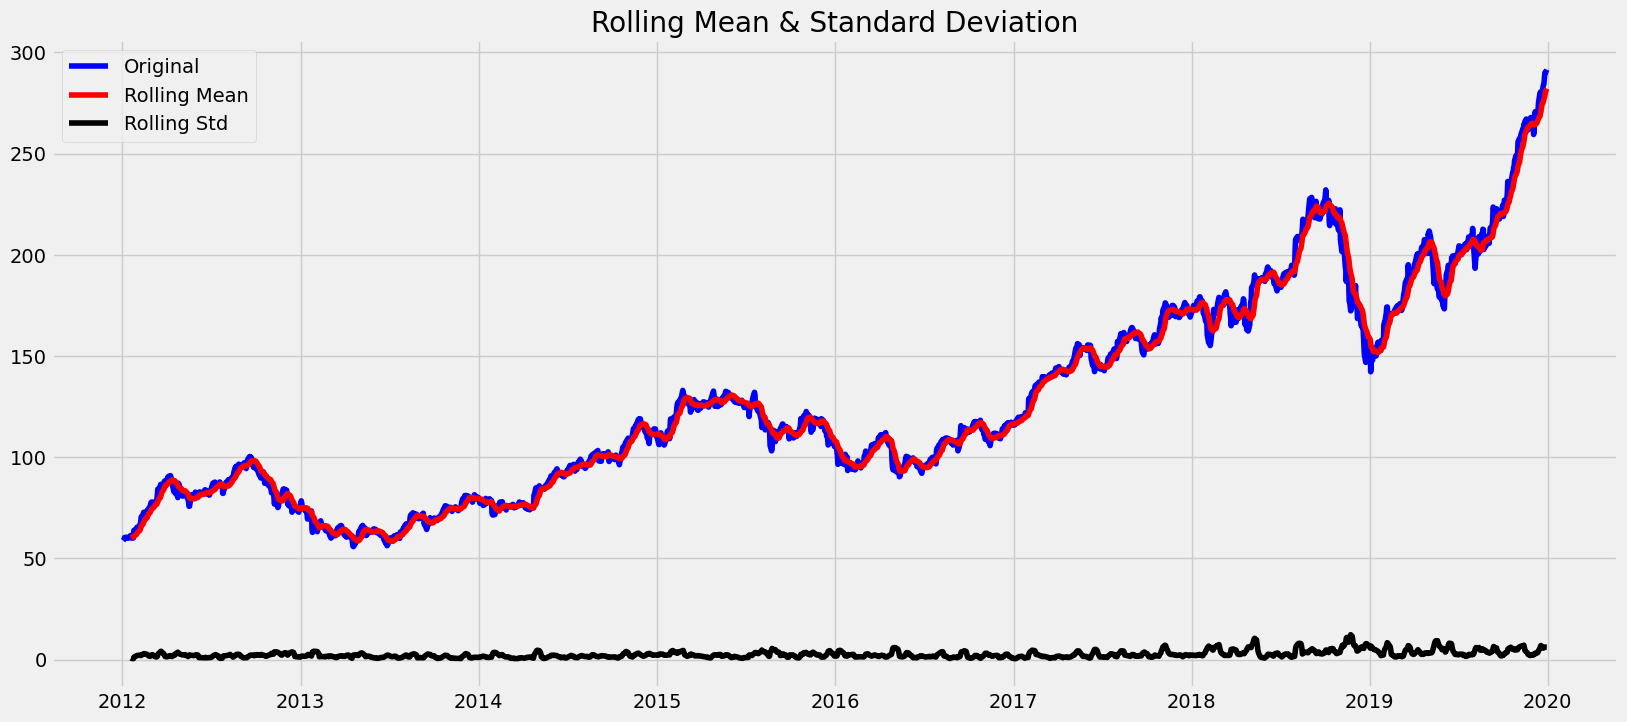

In [36]:
#Determing rolling statistics

rolmean = df1.rolling(12).mean()
rolstd = df1.rolling(12).std()

#Plot rolling statistics:

orig = plt.plot(df1['Close'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

+ We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
+ The time series is hence not stationary

### Augmented Dickey-Fuller Test
+ The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1) will provide no relevant information in predicting the change in y(t).
+ Null hypothesis: The time series is not stationary
+ Rejecting the null hypothesis (i.e. a very low p-value) will indicate staionarity





**Using ADF(Augmented Dickey-Fuller) Test**

+ Null Hypothesis(H0) : Time series has a unit root -**It is non-stationary**

+ Alternate Hypothesis(H1) : Time series does not have a unit root -**It is stationary**

In [37]:
## Testing Stationarity Using ADF

from statsmodels.tsa.stattools import adfuller

In [39]:

test_result = adfuller(df1['Close'])

def adfuller_test(Close):
    result = adfuller(Close)
    labels = ['ADF Test statistic', 'p-value', '#Lag Used', 'Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Reject Null Hypothesis(Ho), Time Series is Stationary ")
    else:
        print("Failed to Reject Null Hypothesis(Ho), Time Series is Non-Stationary")


adfuller_test(df1['Close'])

ADF Test statistic : 1.2193479467002395
p-value : 0.9961168706935021
#Lag Used : 9
Number of Observations Used : 2001
Failed to Reject Null Hypothesis(Ho), Time Series is Non-Stationary


**Statistically verified by ADF Test- that we failed to Reject Null Hypothesis(Ho) our Time Series is Non-Stationary and as observed earlier also by Decomposition(Trend and Seasonality Present)**


### Making Time Series Stationary
There are 2 major reasons behind non-stationaruty of a TS:

+ **Trend** – varying mean over time. For eg, in this case we saw that on average, the number of stock prices was growing over time.

+ **Seasonality** – variations at specific time-frames. 

### Differencing

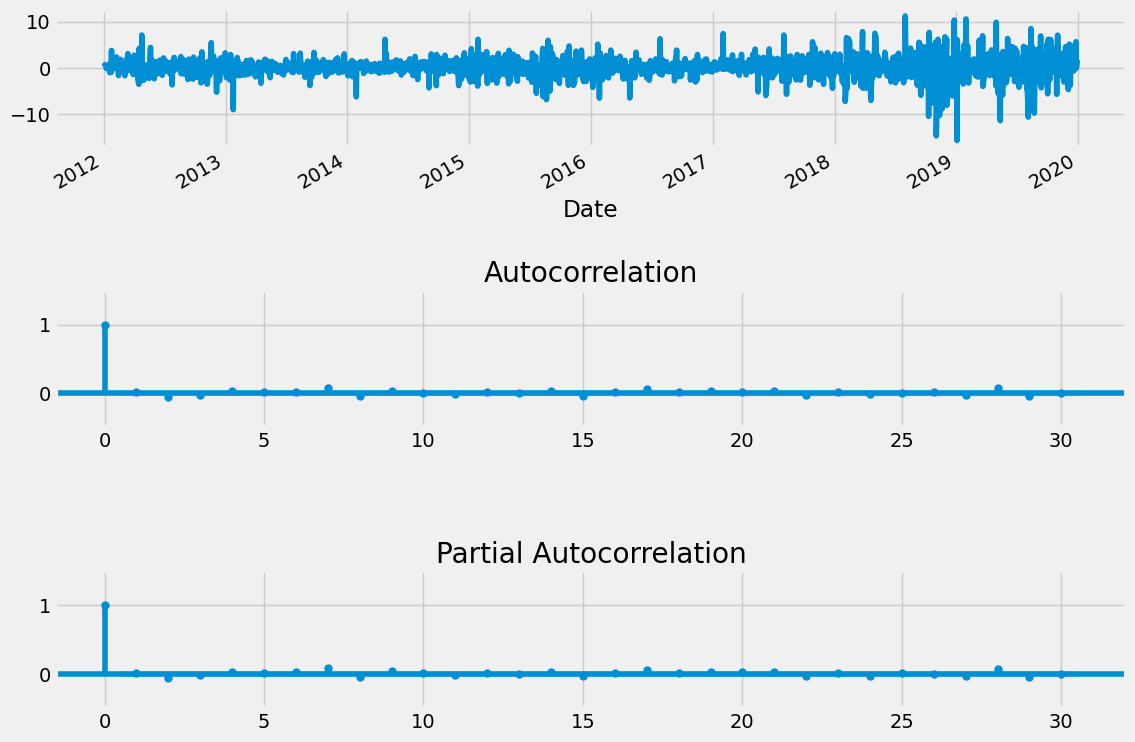

In [41]:
fig,(ax1,ax2,ax3) = plt.subplots(3,figsize=(12,8))
df1['Close'].diff().plot(ax=ax1)
plot_acf(df1['Close'].diff().dropna(),lags=30,ax=ax2)
ax2.set_ylim(-0.5,1.5)
plot_pacf(df1['Close'].diff().dropna(),lags=30,ax=ax3)
ax3.set_ylim(-0.5,1.5)
plt.tight_layout(pad=2)
plt.show()

In [42]:
adfuller_test(df1['Close'].diff().dropna())

ADF Test statistic : -13.625538376073825
p-value : 1.7630934279439238e-25
#Lag Used : 8
Number of Observations Used : 2001
Reject Null Hypothesis(Ho), Time Series is Stationary 


In [43]:
df1.head()

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25


## Model Building

### ARIMA MODEL

+ **ARIMA** – Auto Regression Integrated Moving Average Model. 
+ It goes through differencing steps to eliminate the non-stationary part. 
+ ARIMA Models are specified by three order parameters: (p, d, q) 
   * p is the order of the AR term, 
   * q is the order of the MA    term, 
   * d is the number of differencing required to make the time series stationary
+ An ARIMA model is one where the time series was differenced at least once to make it stationary and we combine the AR and the MA terms.


In [44]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.49,58.93,58.43,58.75,50.77,75555200
2012-01-04,58.57,59.24,58.47,59.06,51.04,65005500
2012-01-05,59.28,59.79,58.95,59.72,51.61,67817400
2012-01-06,59.97,60.39,59.89,60.34,52.14,79573200
2012-01-09,60.79,61.11,60.19,60.25,52.06,98506100


In [45]:
df.drop(["Open",'High','Low','Adj Close','Volume'], axis = 1, inplace = True)
df.head()

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25


In [46]:
# Splitting Data into Train and Test

split_date = "2018-01-01"
train = df.loc[df.index < split_date]
test = df.loc[df.index >= split_date]
print("Train data :", train.shape)
print("Test data :",test.shape)

Train data : (1509, 1)
Test data : (502, 1)


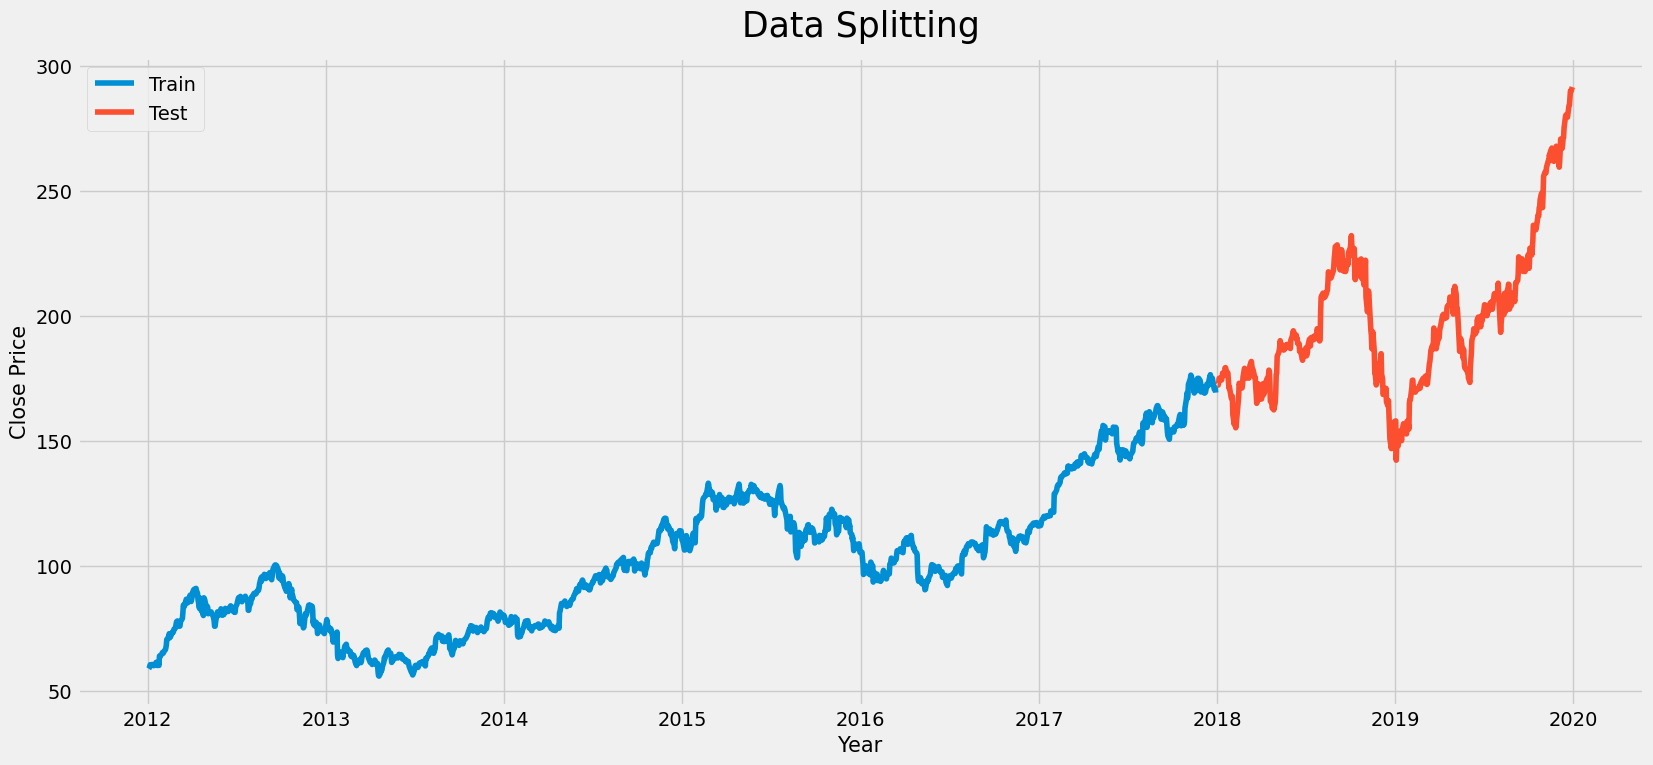

In [47]:
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.title("Data Splitting", size = 25, y = 1.02)
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend()
plt.show()

In [49]:
# Auto-Arima

from pmdarima import auto_arima

In [50]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5589.604, Time=2.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5591.585, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5592.740, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5592.676, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5592.981, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5594.532, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5594.385, Time=0.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5594.068, Time=2.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5594.046, Time=2.86 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5594.158, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5595.597, Time=0.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5595.633, Time=0.82 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5595.542, Time=3.44 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5590.956, Time=1.65 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1509
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2788.802
Date:                Wed, 14 Dec 2022   AIC                           5589.604
Time:                        19:50:44   BIC                           5621.515
Sample:                             0   HQIC                          5601.488
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1060      0.057      1.870      0.061      -0.005       0.217
ar.L1          0.5563      0.014     39.737      0.000       0.529       0.584
ar.L2         -0.9850      0.014    -69.450      0.000      -1.013      -0.957
ma.L1         -0.5644      0.018    -31.595      0.000      -0.599      -0.529
ma.L2          0.9758      0.018     54.045      0.000       0.940       1.011
sigma2         2.3620      0.052     45.138      0.000       2.259       2.465
===================================================================================
Ljung-Box (L1) (Q):                   1.38   Jarque-Bera (JB):               843.54
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['Close'],order = (1,1,1))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2794.704
Date:                Wed, 14 Dec 2022   AIC                           5595.408
Time:                        19:51:00   BIC                           5611.363
Sample:                             0   HQIC                          5601.350
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3193      0.655     -0.487      0.626      -1.604       0.965
ma.L1          0.3500      0.650      0.539      0.590      -0.924       1.624
sigma2         2.3836      0.052     46.165      0.000       2.282       2.485
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               866.63
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+501,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
Date,
2018-01-02,169.174040
2018-01-03,169.191910
2018-01-04,169.186203
2018-01-05,169.188026
2018-01-08,169.187444
...,...
2019-12-23,169.187585
2019-12-24,169.187585
2019-12-26,169.187585


In [53]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
Date                      
2018-01-02      169.174040
2018-01-03      169.191910
2018-01-04      169.186203
2018-01-05      169.188026
2018-01-08      169.187444
...                    ...
2019-12-23      169.187585
2019-12-24      169.187585
2019-12-26      169.187585
2019-12-27      169.187585
2019-12-30      169.187585

[502 rows x 1 columns]


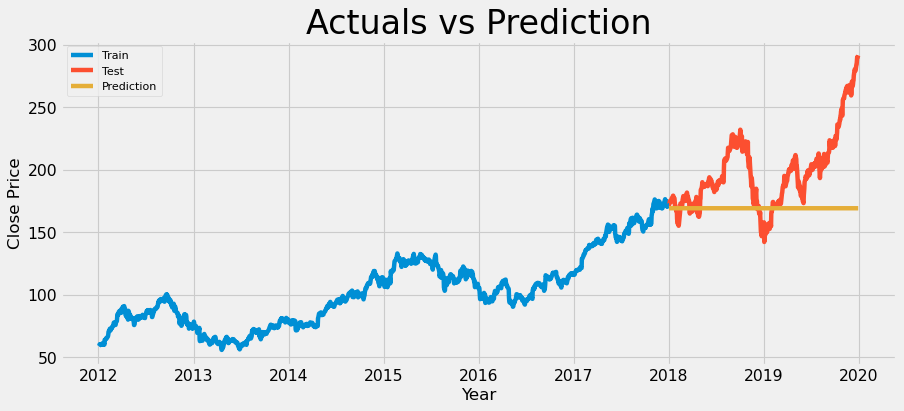

In [55]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

**Here, we got straight line because we have seasonal patterns in our data. So, ARIMA Model wont work for us.**

In [56]:

from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

**RMSE : It measures the average magnitude of the errors and is concerned with the deviations from the actual value. RMSE value with zero indicates that the model has a perfect fit. The lower the RMSE, the better the model and its predictions.**
#### Mean absolute error: 
**It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset. Mathematically speaking, it is the arithmetic average of absolute errors. MAE measures only the magnitude of the errors and doesn’t concern itself with their direction. The lower the MAE, the higher the accuracy of a model.**

In [58]:
mse = mean_squared_error(test_pred['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1740.3560168239135
Root Mean Squared Error (RMSE) =  41.72
Mean Absolute Error (MAE)  =  31.587587177247517
Mean Absolute Percentage Error (MAPE)  =  0.18670156921977032


## SARIMA MODEL 

+ An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA - Seasonal Autoregressive Integrated Moving Average.
+ There are four seasonal elements that are not part of ARIMA that must be configured; they are:
* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.


In [64]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 22) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [70]:
import statsmodels.api as sm

In [76]:
model_SA = sm.tsa.SARIMAX(train['Close'], order=(0,1,2), seasonal_order=(1,1,0,66))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1509
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 66)   Log Likelihood               -3016.116
Date:                             Wed, 14 Dec 2022   AIC                           6040.232
Time:                                     20:11:29   BIC                           6061.327
Sample:                                          0   HQIC                          6048.106
                                            - 1509                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0037      0.023      0.160      0.873      -0.042       0.049
ma.L2         -0.0329      0.025     -1.307      0.191      -0.082       0.016
ar.S.L66      -0.4966      0.018    -28.337      0.000      -0.531      -0.462
sigma2         3.7901      0.090     42.147      0.000       3.614       3.966
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               548.63
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+501,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
Date,
2018-01-02,170.072161
2018-01-03,169.463860
2018-01-04,168.848893
2018-01-05,169.735641
2018-01-08,169.005296
...,...
2019-12-23,276.735603
2019-12-24,278.666346
2019-12-26,277.815520


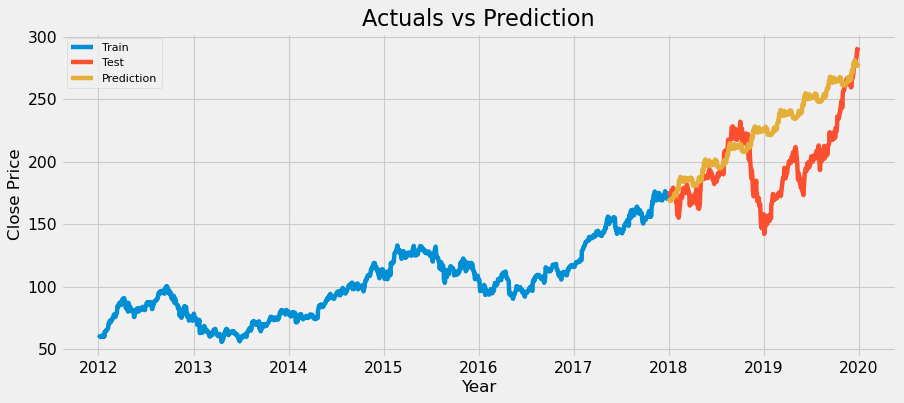

In [78]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

+ ** Here, in SARIMA Model we can see that prediction is showing an upward trend. So, We can use this model for future Prediction**
+ ** Also we have to predict for next 30 days, So Sarima is the good model to go with it because, SARIMA model is accurate on short-period forecasting but less accurate on long-period forecasting.**
 
 


In [79]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1326.4440427389102
Root Mean Squared Error (RMSE) =  36.42
Mean Absolute Error (MAE)  =  28.50833475028065
Mean Absolute Percentage Error (MAPE)  =  0.12270984482267983


### Forecast for next 30 days ( Using Sarima Model)

In [83]:
forecast_SA = result_SA.predict(len(df), len(df)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2019-12-31', end = '2020-01-31')
forecast_SA.index=index_future_dates
print(forecast_SA)

2019-12-31    279.799050
2020-01-01    280.655338
2020-01-02    280.132366
2020-01-03    279.214846
2020-01-04    277.006676
2020-01-05    279.125434
2020-01-06    279.065936
2020-01-07    278.374619
2020-01-08    278.482390
2020-01-09    278.077185
2020-01-10    277.633460
2020-01-11    277.610732
2020-01-12    279.604935
2020-01-13    278.086171
2020-01-14    279.416508
2020-01-15    279.171465
2020-01-16    279.942944
2020-01-17    281.130123
2020-01-18    280.400546
2020-01-19    279.873353
2020-01-20    280.335005
2020-01-21    279.455658
2020-01-22    275.597481
2020-01-23    275.121692
2020-01-24    275.000034
2020-01-25    274.617815
2020-01-26    275.541907
2020-01-27    274.820647
2020-01-28    274.686664
2020-01-29    275.177790
2020-01-30    274.910373
2020-01-31    274.355812
Freq: D, Name: predicted_mean, dtype: float64


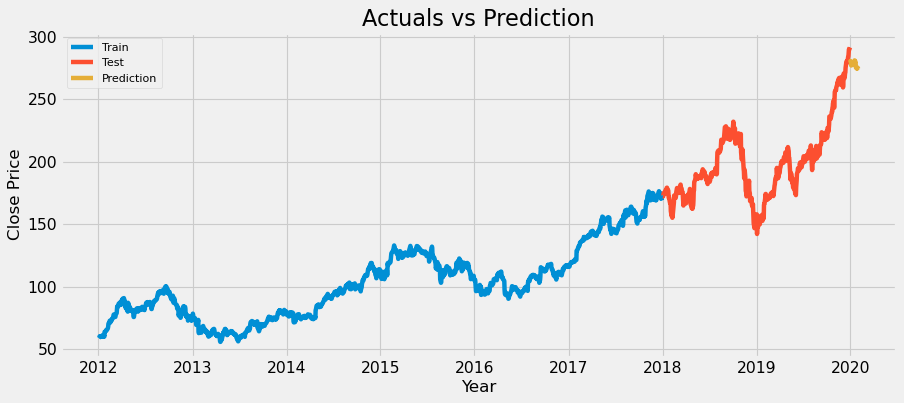

In [84]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(forecast_SA, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

### Holt Winter's  Method

In [85]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

+ Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.
+ Set the value of Alpha and define m (Time Period)'''


In [86]:
m = 22
alpha = 1/(2*m)

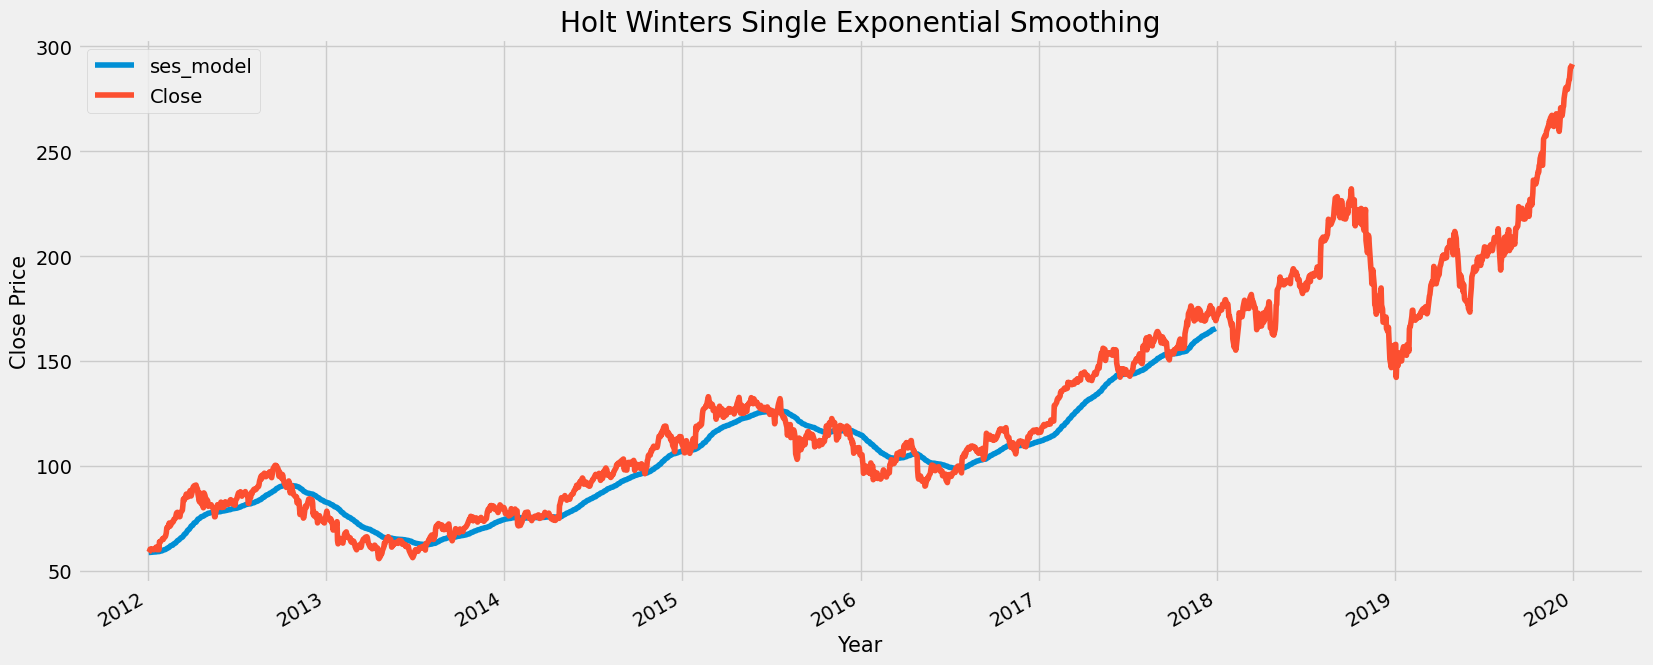

In [87]:
# Single/Simple Exponential Method
df['ses_model'] = SimpleExpSmoothing(train["Close"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
df[['ses_model','Close']].plot(title='Holt Winters Single Exponential Smoothing', legend=True)
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.show()


+ As expected, it didn’t fit quite well, and rightfully because, Single ES doesn’t work for data with Trends and Seasonality.
+ Double HWES
 * So, we’d fit the data on Double ES, on both Additive and Multiplicative Trend,

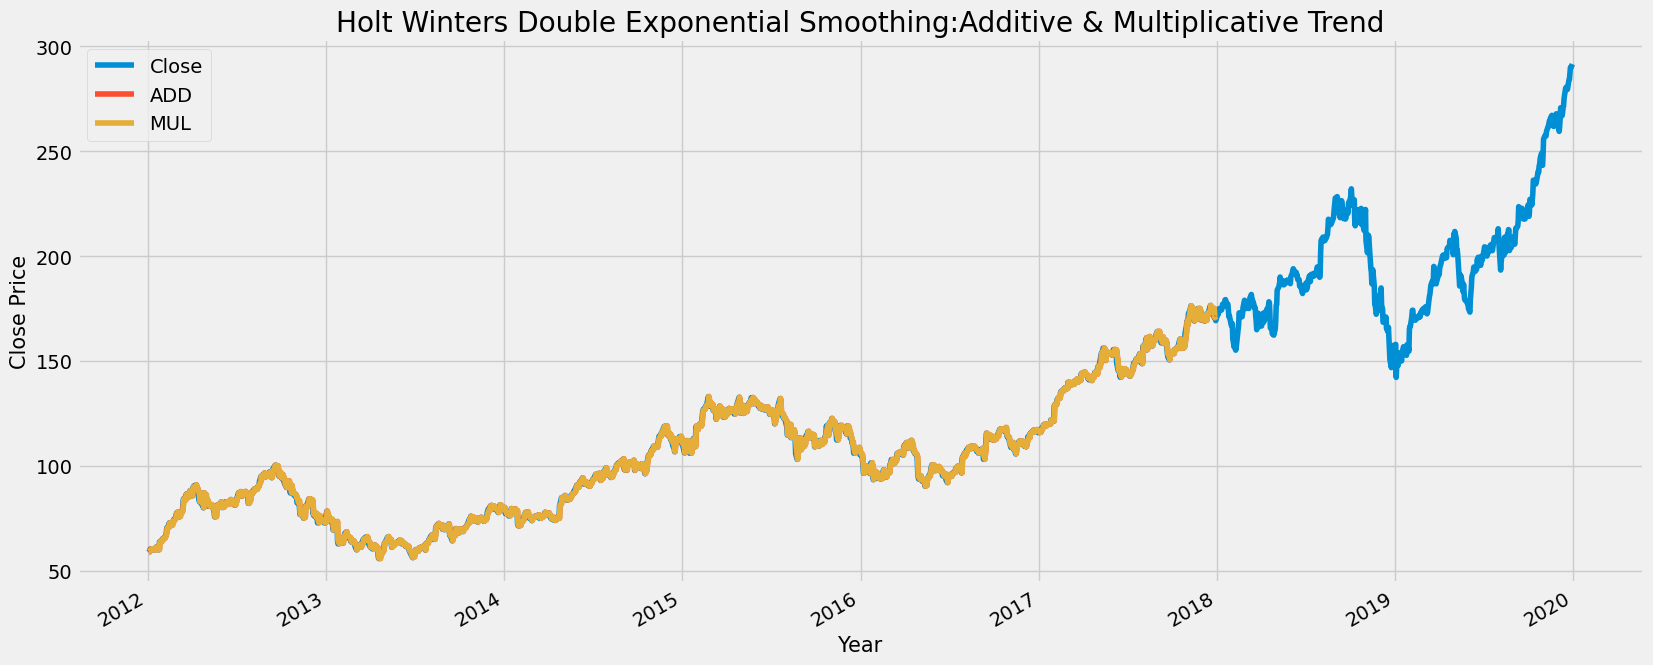

In [88]:
df['ADD'] = ExponentialSmoothing(train['Close'],trend='add').fit().fittedvalues
df['MUL'] = ExponentialSmoothing(train['Close'],trend='mul').fit().fittedvalues
df[['Close','ADD','MUL']].plot(title='Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend')
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.show()

+ This looks promising! Here we have plotted for both Additive and Multiplicative Seasonality.

**Forecasting with Holt-Winters Exponential Smoothing (Triple ES):** 
* Let’s try and forecast sequences, let us start by dividing the dataset into Train and Test Set.

In [90]:
# Fit the model tend='mul', season='mul'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=66).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    168.761826
2018-01-03    169.466025
2018-01-04    170.148999
2018-01-05    170.335762
2018-01-08    170.626117
                 ...    
2019-12-23    235.279500
2019-12-24    236.226064
2019-12-26    235.817281
2019-12-27    235.549182
2019-12-30    235.578136
Length: 502, dtype: float64


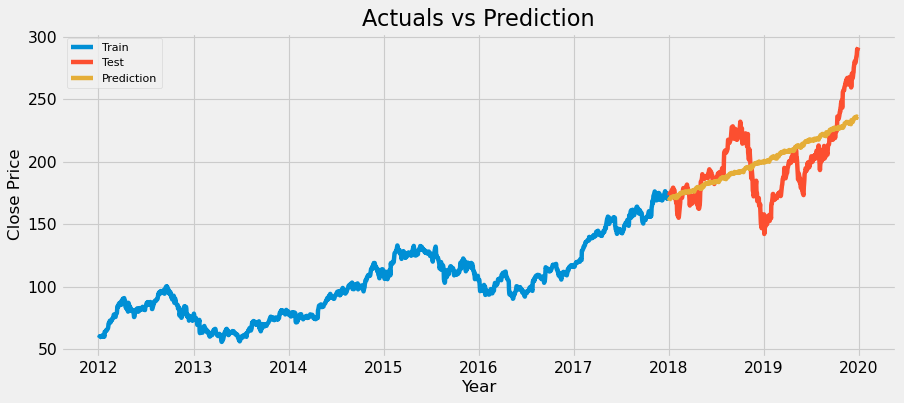

In [91]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

**Here, also we can see that our prediction using Holt Winter Method is upward.** 
+ But, we will be using SARIMA Model only because, SARIMA has more input parameters than Holt-Winters Method and has a better prediction.


In [92]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  528.3950618174459
Root Mean Squared Error (RMSE) =  22.99
Mean Absolute Error (MAE)  =  18.418693518878065
Mean Absolute Percentage Error (MAPE)  =  0.09413163553641057


In [93]:
# Fit the model tend='add', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=66).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    168.726899
2018-01-03    169.394000
2018-01-04    170.039025
2018-01-05    170.189525
2018-01-08    170.440478
                 ...    
2019-12-23    207.777378
2019-12-24    208.551770
2019-12-26    208.131712
2019-12-27    207.838592
2019-12-30    207.805477
Length: 502, dtype: float64


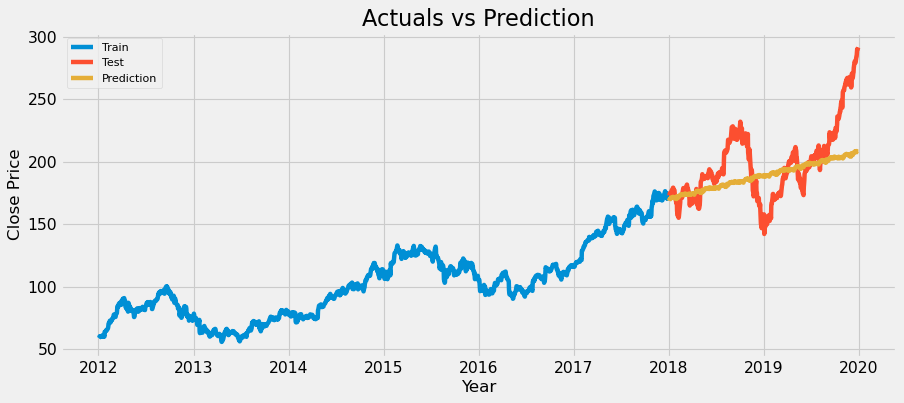

In [94]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [95]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  691.2682063565054
Root Mean Squared Error (RMSE) =  26.29
Mean Absolute Error (MAE)  =  19.360354666918116
Mean Absolute Percentage Error (MAPE)  =  0.09243315101102467


In [96]:
# Fit the model tend='mul', season='add'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='add',seasonal_periods=66).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    168.879164
2018-01-03    169.333735
2018-01-04    169.752964
2018-01-05    169.909201
2018-01-08    170.070515
                 ...    
2019-12-23    232.872666
2019-12-24    233.228854
2019-12-26    233.057373
2019-12-27    233.126128
2019-12-30    233.153315
Length: 502, dtype: float64


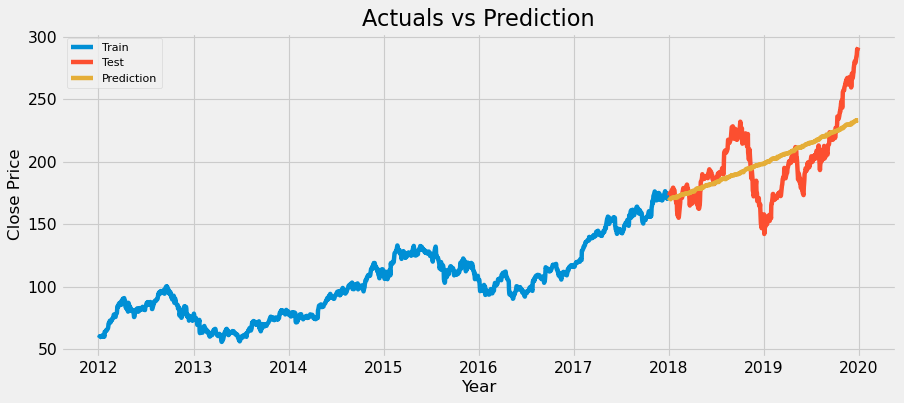

In [97]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [98]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  524.3695305308332
Root Mean Squared Error (RMSE) =  22.9
Mean Absolute Error (MAE)  =  18.234536756057732
Mean Absolute Percentage Error (MAPE)  =  0.09273648559405953


In [99]:
# Fit the model tend='add', season='add'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=66).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    168.844079
2018-01-03    169.263740
2018-01-04    169.649217
2018-01-05    169.772094
2018-01-08    169.900244
                 ...    
2019-12-23    206.600770
2019-12-24    206.881892
2019-12-26    206.634827
2019-12-27    206.628623
2019-12-30    206.580884
Length: 502, dtype: float64


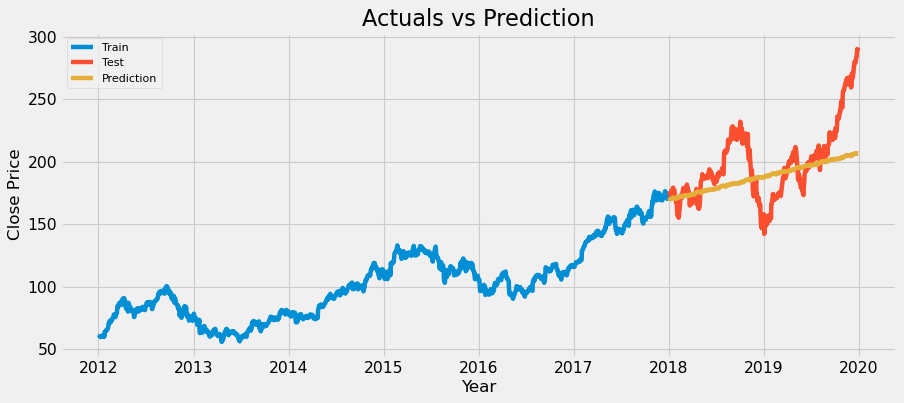

In [100]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [101]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  706.2226914694745
Root Mean Squared Error (RMSE) =  26.57
Mean Absolute Error (MAE)  =  19.608600648904208
Mean Absolute Percentage Error (MAPE)  =  0.09339595965786474


## Conclusion 

1) We will be selecting SARIMA model because our data is  Seasonal.       

2) SARIMA has more input parameters than Holt-Winters Method and has a better prediction.                                                      

3) SARIMA model is accurate on short-period forecasting but less accurate on long-period forecasting.